In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Polynomial Regression 

In [3]:
df = pd.read_csv('../Regression/Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) 

## Make X_train into Polynomial and fit into the Linear regression model. Fit the X_train(Polynomial) and the y_train into the Linear regression model.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
Poly_reg = PolynomialFeatures(degree = 4)
X_poly = Poly_reg.fit_transform(X_train)
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y_train)

LinearRegression()

In [20]:
y_pred = linear_reg.predict(Poly_reg.transform(X_test))

In [21]:
y_pred

array([433.94, 457.9 , 460.52, ..., 469.53, 438.27, 461.67])

In [22]:
y_test = y_test.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)

In [23]:
np.set_printoptions(precision=2)
np.concatenate((y_pred, y_test), 1)

array([[433.94, 431.23],
       [457.9 , 460.01],
       [460.52, 461.14],
       ...,
       [469.53, 473.26],
       [438.27, 438.  ],
       [461.67, 463.28]])

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.945819368318529

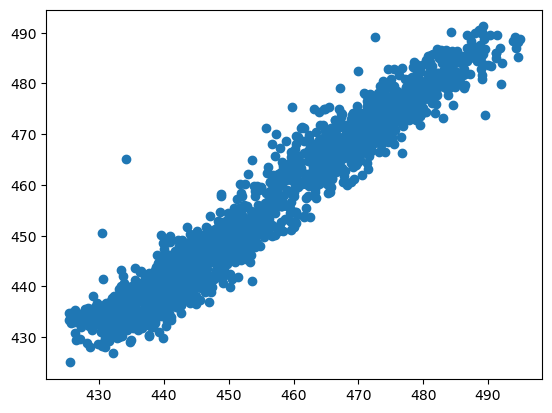

In [25]:
plt.scatter(y_test, y_pred)